In [1]:
# Importing Required packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import linear_model
from sklearn.metrics import r2_score

In [2]:
# Connecting Google Colab with Google Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# Reading the Saratoga House Price Data set
df = pd.read_csv('/content/drive/MyDrive/Project_Data_Sets/SaratogaHouses.csv')
df.head()

,price,lotSize,age,landValue,livingArea,pctCollege,bedrooms,fireplaces,bathrooms,rooms,heating,fuel,sewer,waterfront,newConstruction,centralAir
0,132500,0.09,42,50000,906,35,2,1,1.0,5,electric,electric,septic,No,No,No
1,181115,0.92,0,22300,1953,51,3,0,2.5,6,hot water/steam,gas,septic,No,No,No
2,109000,0.19,133,7300,1944,51,4,1,1.0,8,hot water/steam,gas,public/commercial,No,No,No
3,155000,0.41,13,18700,1944,51,3,1,1.5,5,hot air,gas,septic,No,No,No
4,86060,0.11,0,15000,840,51,2,0,1.0,3,hot air,gas,public/commercial,No,Yes,Yes


In [4]:
# Getting the shape of the data set
print('Number of Rows in the data frame:', df.shape[0])
print('Number of Columns in the data frame:', df.shape[1])

Number of Rows in the data frame: 1728
Number of Columns in the data frame: 16


In [ ]:
# Getting the columns of the data set named df
print('Column names are:', df.columns)

Column names are: Index(['price', 'lotSize', 'age', 'landValue', 'livingArea', 'pctCollege',
       'bedrooms', 'fireplaces', 'bathrooms', 'rooms', 'heating', 'fuel',
       'sewer', 'waterfront', 'newConstruction', 'centralAir'],
      dtype='object')


In [ ]:
# Getting the shape of the data set
print('Number of Rows in the data frame:', df.shape[0])
print('Number of Columns in the data frame:', df.shape[1])

Number of Rows in the data frame: 1728
Number of Columns in the data frame: 16


In [ ]:
# Getting the column types of the data set
print('Columns are type of:', df.dtypes)

Columns are type of: price                int64
lotSize            float64
age                  int64
landValue            int64
livingArea           int64
pctCollege           int64
bedrooms             int64
fireplaces           int64
bathrooms          float64
rooms                int64
heating             object
fuel                object
sewer               object
waterfront          object
newConstruction     object
centralAir          object
dtype: object


In [ ]:
# Getting Statistical Summary of the data frame df
df.describe()

,price,lotSize,age,landValue,livingArea,pctCollege,bedrooms,fireplaces,bathrooms,rooms
count,1728.000000,1728.000000,1728.000000,1728.000000,1728.000000,1728.000000,1728.000000,1728.000000,1728.000000,1728.000000
mean,211966.705440,0.500214,27.916088,34557.187500,1754.975694,55.567708,3.154514,0.601852,1.900174,7.041667
std,98441.391015,0.698680,29.209988,35021.168056,619.935553,10.333581,0.817351,0.556102,0.658352,2.316453
min,5000.000000,0.000000,0.000000,200.000000,616.000000,20.000000,1.000000,0.000000,0.000000,2.000000
25%,145000.000000,0.170000,13.000000,15100.000000,1300.000000,52.000000,3.000000,0.000000,1.500000,5.000000
50%,189900.000000,0.370000,19.000000,25000.000000,1634.500000,57.000000,3.000000,1.000000,2.000000,7.000000
75%,259000.000000,0.540000,34.000000,40200.000000,2137.750000,64.000000,4.000000,1.000000,2.500000,8.250000
max,775000.000000,12.200000,225.000000,412600.000000,5228.000000,82.000000,7.000000,4.000000,4.500000,12.000000


In [ ]:
# Creating project data set from the main data set df and name it as reg
reg = df[['price','livingArea','bedrooms','rooms','age']]
reg.head(10)

,price,livingArea,bedrooms,rooms,age
0,132500,906,2,5,42
1,181115,1953,3,6,0
2,109000,1944,4,8,133
3,155000,1944,3,5,13
4,86060,840,2,3,0
5,120000,1152,4,8,31
6,153000,2752,4,8,33
7,170000,1662,4,9,23
8,90000,1632,3,8,36
9,122900,1416,3,6,4


<Figure size 1000x1000 with 0 Axes>

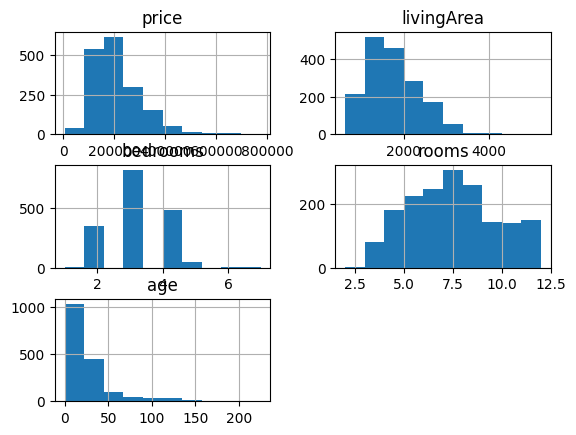

In [ ]:
# Visualize the distribution of the data set called reg
viz = reg[['price','livingArea','bedrooms','rooms','age']]
plt.figure(figsize = (10,10))
viz.hist()
plt.show()
# Each numerical column's distribution is given by histogram

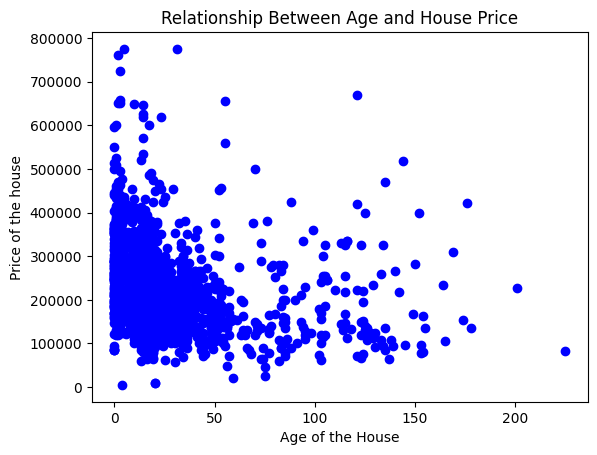

In [ ]:
# Visualize the relationship between price and age
plt.scatter(reg['age'], reg['price'], color = 'blue')
plt.xlabel('Age of the House')
plt.ylabel('Price of the house')
plt.title('Relationship Between Age and House Price')
plt.show() # As age of house increases, price decreases

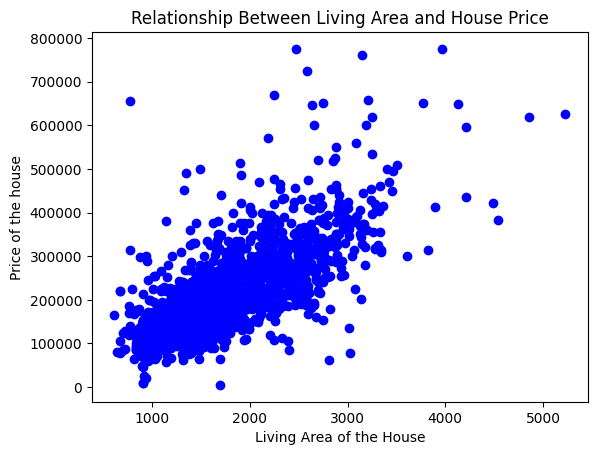

In [ ]:
# Visualize the relationship between price and livingArea
plt.scatter(reg['livingArea'], reg['price'], color = 'blue')
plt.xlabel('Living Area of the House')
plt.ylabel('Price of the house')
plt.title('Relationship Between Living Area and House Price')
plt.show() # As Living area of house increases, price also increases

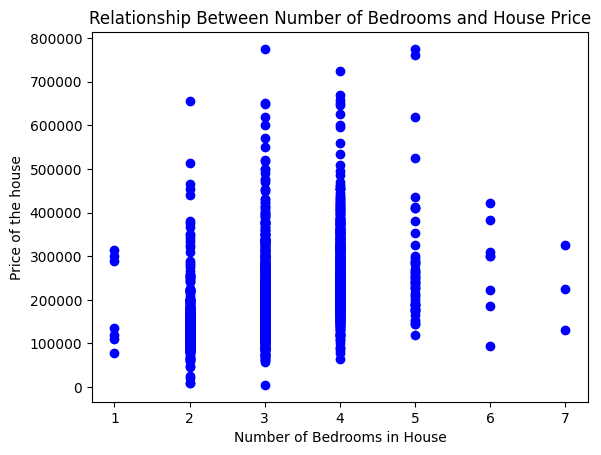

In [ ]:
# Visualize the relationship between price and bedrooms
plt.scatter(reg['bedrooms'], reg['price'], color = 'blue')
plt.xlabel('Number of Bedrooms in House')
plt.ylabel('Price of the house')
plt.title('Relationship Between Number of Bedrooms and House Price')
plt.show() # As Number of Bedrooms of house increases, price increases at a level
# After that level price decreases

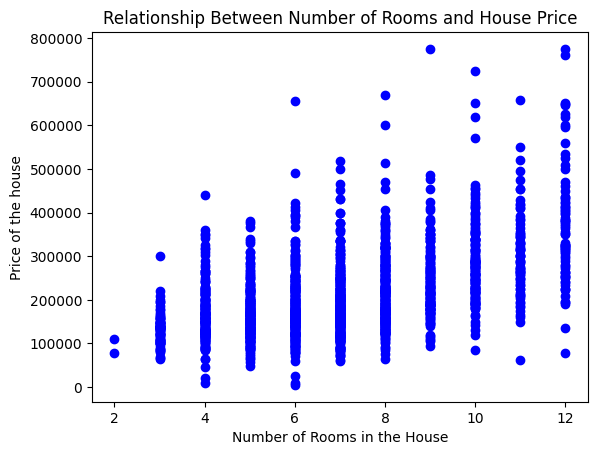

In [ ]:
# Visualize the relationship between price and Number of rooms
plt.scatter(reg['rooms'], reg['price'], color = 'blue')
plt.xlabel('Number of Rooms in the House')
plt.ylabel('Price of the house')
plt.title('Relationship Between Number of Rooms and House Price')
plt.show() # As Number of Rooms in house increases, price also increases

In [ ]:
# Train Test split Method for Regression Analysis
# Most general assumption: Use 80% data to train model and 20% data to test
obj = np.random.rand(len(df))< 0.8
train = reg[obj]
test = reg[~ obj]

### Simple Linear Regression Model Building
In simple Linear Regression Model, we have a continuous Dependent variable and a independent variable (categorical or continuous).
Here we are considering **price** as the continuous dependnet variable and **livingArea** as the independent variable. Observe that, in this case the our independent variable is also continuous.

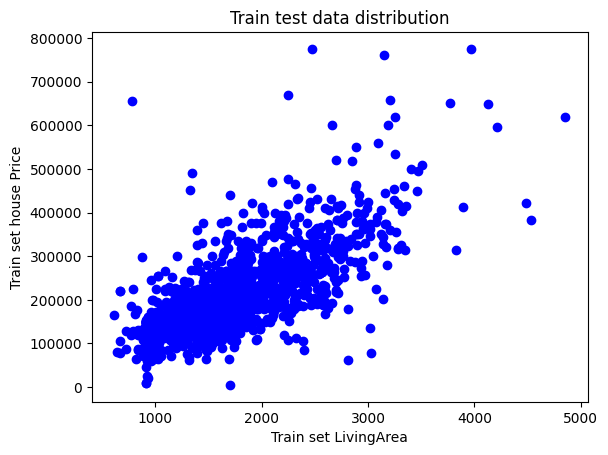

In [ ]:
# Distribution of data of Train set
plt.scatter(train['livingArea'], train['price'], color = 'blue')
plt.xlabel('Train set LivingArea')
plt.ylabel('Train set house Price')
plt.title('Train test data distribution')
plt.show()

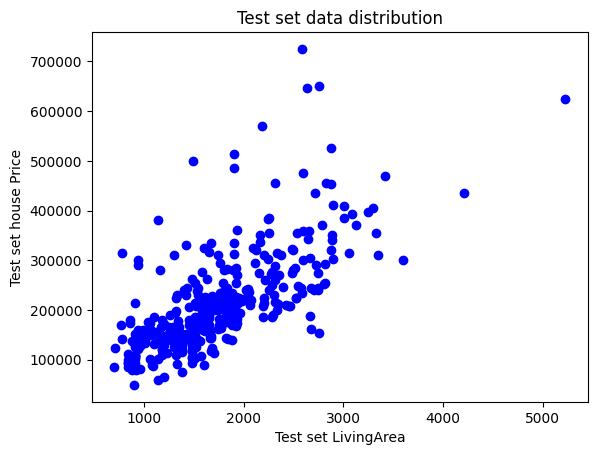

In [ ]:
# Distribution of data of Test set
plt.scatter(test['livingArea'], test['price'], color = 'blue')
plt.xlabel('Test set LivingArea')
plt.ylabel('Test set house Price')
plt.title('Test set data distribution')
plt.show()

In [ ]:
# Simple Linaer Regression Model Building and Predicting Outcome

# Define Linear Regression Object
model_slrm = linear_model.LinearRegression()

                            # Defining Train, Test data for X and Y respectively
# Train set data defining
train_x = np.asanyarray(train[['livingArea']])
train_y = np.asanyarray(train[['price']])

# Test set data defining
test_x = np.asanyarray(test[['livingArea']])
test_y = np.asanyarray(test[['price']])

# Building the Linear Regression Model
model_slrm.fit(train_x, train_y)

# Getting the Intercept and Model coefficients
print('SLRM Model Intercept:', model_slrm.intercept_)
print('SLRM Model Coefficient:', model_slrm.coef_)

SLRM Model Intercept: [11608.79780491]
SLRM Model Coefficient: [[113.62833208]]


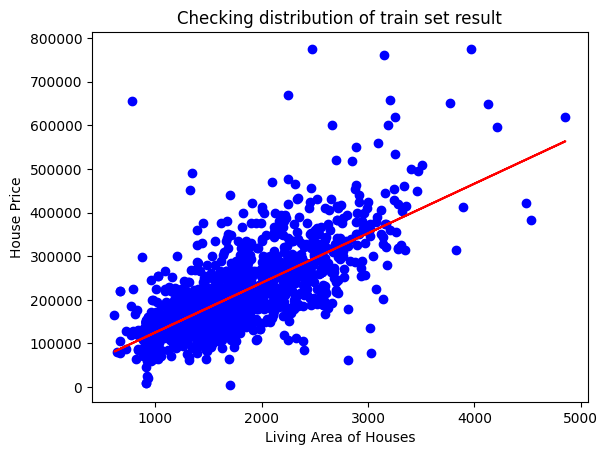

In [ ]:
# Plot the output that we get from training data set
plt.scatter(train['livingArea'], train['price'], color = 'blue')
plt.plot(train_x,
         model_slrm.coef_[0][0]*train_x + model_slrm.intercept_[0], '-r')
plt.xlabel('Living Area of Houses')
plt.ylabel('House Price')
plt.title('Checking distribution of train set result')
plt.show()

In [ ]:
# Predicting the model using test data and Model Evaluation Matrics
y_hat = model_slrm.predict(test_x)

# Evaluation Matrics: Mean Absolute Error (MAE)
print('Mean Absolute Error is:', '%.2f' % np.mean(np.absolute(y_hat - test_y)))

# Evaluation Matrics: Residual Sum of Squares
print('Residual Sum of Squares is:', '%.2f' % np.mean((y_hat - test_y)**2))

# Evaluation Matrics: R squared value
print('R Squared Value:', '%.2f' % r2_score(test_y, y_hat))

Mean Absolute Error is: 49670.88
Residual Sum of Squares is: 5483805070.81
R Squared Value: 0.48


### Multiple Linear Regression Model
In Multiple Linear Regression Model, more than one independent variabel is used to predic one continuous dependent variable. In our case, we consider **price** as that continuos dependent variable. As independent variable, we are considering the variables **livingArea**, **age**, **bedrooms** and **rooms**.

In [ ]:
# Multiple Linear Regression Model Building and Predicting Outcome

# Define Linear Regression Object
model_mlrm = linear_model.LinearRegression()

                            # Defining Train and Test data for this MLRM
# Train data define as following
train_x = np.asanyarray(train[['livingArea','age','rooms','bedrooms']])
train_y = np.asanyarray(train[['price']])

# Test data define as following
test_x = np.asanyarray(test[['livingArea','age','rooms','bedrooms']])
test_y = np.asanyarray(test[['price']])

# Building the Multiple Linear Regression Model
model_mlrm.fit(train_x, train_y)

# Defining intercept value and model coefficients
print('MLRM Model Intercept:', model_mlrm.intercept_)
print('MLRM Model Coefficients:', model_mlrm.coef_)

MLRM Model Intercept: [38532.75974439]
MLRM Model Coefficients: [[   118.56838646   -175.93295567   2211.83983371 -14619.0118907 ]]


In [ ]:
# Predictig the outcome using test data and model evaluation matrics
y_hat = model_mlrm.predict(test_x)

# Model Evaluation Mtarics: Mean Squared error
print('Residual Sum of Squares:' , '%.2f' % np.mean((y_hat - test_y)**2))

# Model Evaluation Mtrics: R Squared value
print('R Squared Value:' , '%.2f' % r2_score(test_y, y_hat))

Residual Sum of Squares: 5320823025.73
R Squared Value: 0.49
